In [2]:
import math
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from bs4 import BeautifulSoup

def update_data(xls, csv):
    df = pd.read_csv(csv, index_col= ['Date'], parse_dates=True)
    html = BeautifulSoup(open(xls, encoding='utf8'), "lxml")
    items = []

    for tr in html.find_all("tr")[1:]:
        children = list(tr.children)
        d = dt.datetime.strptime(children[2].string, "%Y/%m/%d %H:%M:%S")
        if d > df.index[-1]:
            dict = {'Code': children[0].string, 
                'Name': children[1].string,
                'Date': d,
                'Close': children[3].string,
                'Volumn': children[4].string,
                'Change': children[5].string,
                'Turnover': children[6].string,
                'PE': children[7].string,
                'PB': children[8].string,
                'Average': children[9].string,
                'AmountPercentage': children[10].string,
                'HQLTSZ': children[11].string.replace(',', ''),
                'AHQLTSZ': children[12].string.replace(',', ''),
                'Payout': children[13].string}
            # Code,Name,Date,Open,High,Low,Close,Volumn,Amount,Change,Turnover,PE,PB,Average,AmountPercentage,HQLTSZ,AHQLTSZ,Payout
            item_str = '{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}'.format(
                        dict["Code"], dict["Name"], dict["Date"].strftime("%m/%d/%Y"), '', '', '',
                        dict["Close"], dict["Volumn"], '', 
                        dict["Change"], dict["Turnover"], dict["PE"], dict["PB"],
                        dict["Average"], dict["AmountPercentage"], 
                        dict["HQLTSZ"], dict["AHQLTSZ"], dict["Payout"])
            items.append(item_str)

    with open(csv, 'a', encoding="utf-8") as file:
        for i in reversed(items):    
            file.write(i + "\n")

update_data(r'C:/Users/nn1003/Downloads/801811.xls', r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801811.csv')
update_data(r'C:/Users/nn1003/Downloads/801813.xls', r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801813.csv')

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 9999) 
pd.set_option('precision', 3)

df_xp = pd.read_csv(r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801813.csv', 
                  index_col= ['Date'], parse_dates=True)

df_jy = pd.read_csv(r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801811.csv', 
                  index_col= ['Date'], parse_dates=True)

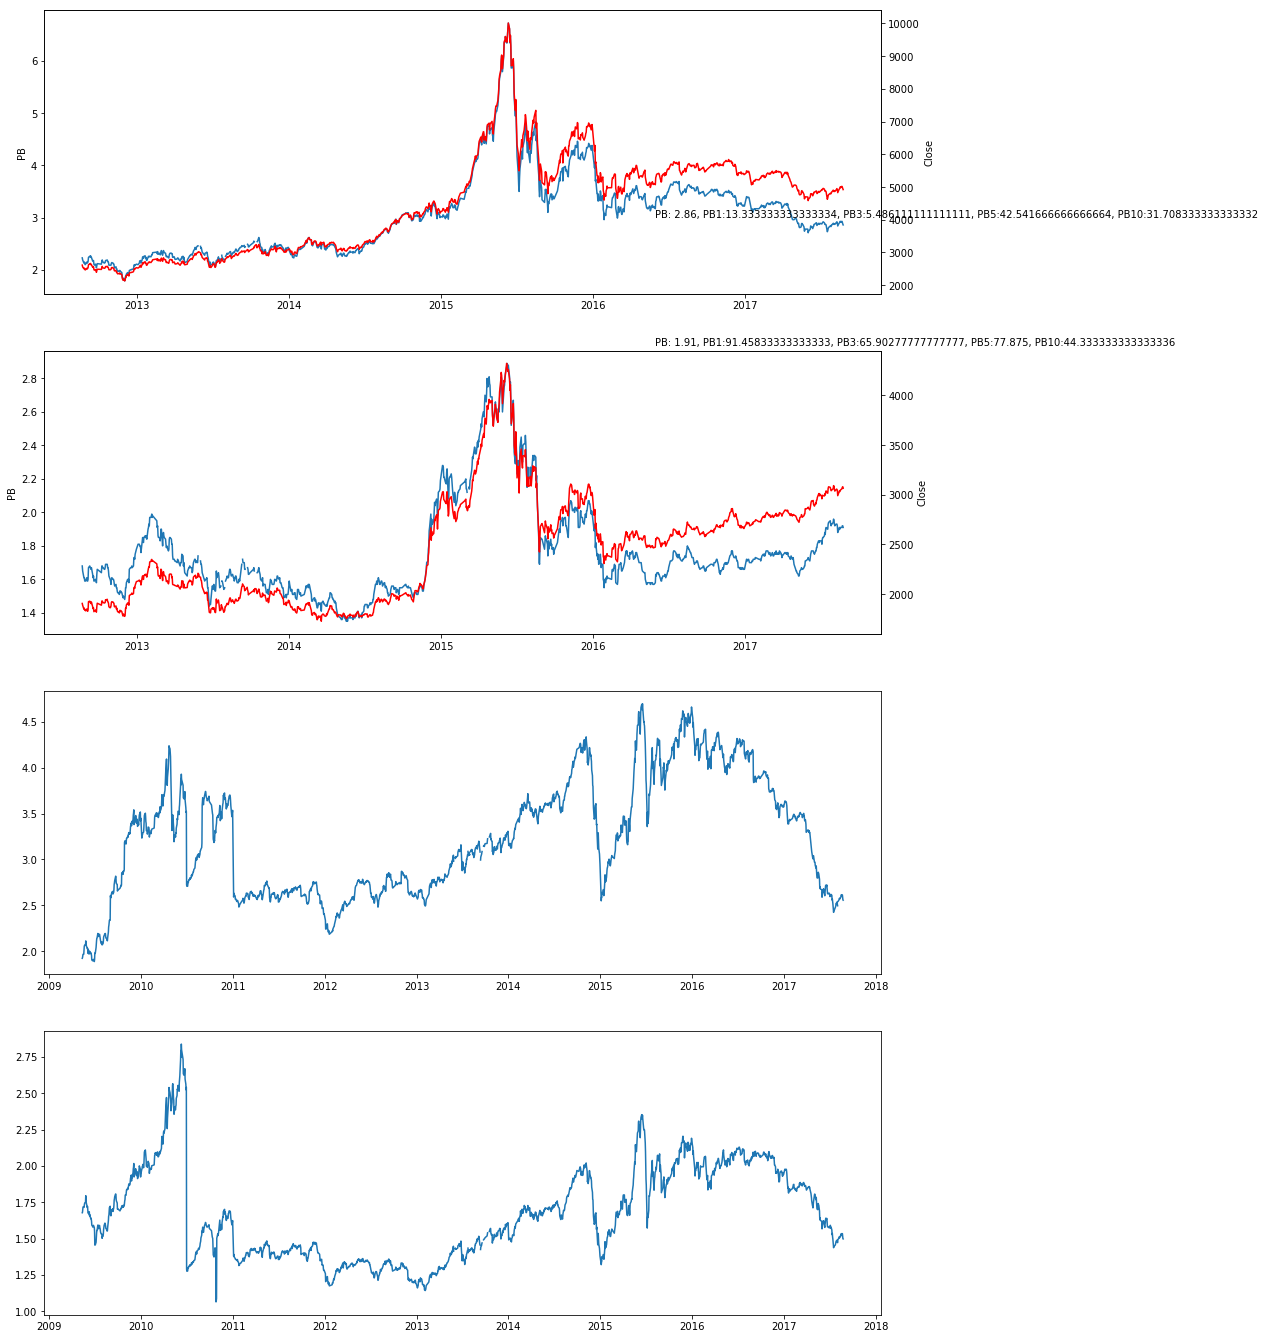

In [4]:
fig, axes = plt.subplots(4, 1, figsize=(15, 24))

ax1 = axes[0]
ax1.plot(df_xp['PB'][-1200:])
ax1.set_ylabel('PB')
ax2 = ax1.twinx()
ax2.plot(df_xp['Close'][-1200:], 'r')
ax2.set_ylabel('Close')

last_PB = df_xp['PB'][-1]

ax1.text(df_xp.index[-300], 3,
         'PB: {}, PB1:{}, PB3:{}, PB5:{}, PB10:{}'.format(
             float(last_PB),
             float(stats.percentileofscore(df_xp['PB'][-240:], last_PB)),
             float(stats.percentileofscore(df_xp['PB'][-720:], last_PB)),
             float(stats.percentileofscore(df_xp['PB'][-1200:], last_PB)),
             float(stats.percentileofscore(df_xp['PB'][-2400:], last_PB))))


ax2 = axes[1]
ax2.plot(df_jy['PB'][-1200:])
ax2.set_ylabel('PB')
ax3 = ax2.twinx()
ax3.plot(df_jy['Close'][-1200:], 'r')
ax3.set_ylabel('Close')

last_PB = df_jy['PB'][-1]
ax2.text(df_jy.index[-300], 3,
         'PB: {}, PB1:{}, PB3:{}, PB5:{}, PB10:{}'.format(
             float(last_PB),
             float(stats.percentileofscore(df_jy['PB'][-240:], last_PB)),
             float(stats.percentileofscore(df_jy['PB'][-720:], last_PB)),
             float(stats.percentileofscore(df_jy['PB'][-1200:], last_PB)),
             float(stats.percentileofscore(df_jy['PB'][-2400:], last_PB))))

ax3 = axes[2]
ax3.plot(df_xp['PE'][-2000:] / df_jy['PE'][-2000:] )

ax4 = axes[3]
ax4.plot(df_xp['PB'][-2000:] / df_jy['PB'][-2000:] )
 
plt.show()


In [4]:
(df_xp['PE'][-1600:] / df_jy['PE'][-1600:]).min(), df_xp['PE'][-20:] / df_jy['PE'][-20:]

(2.1855500821018063, Date
 2017-06-23    2.626
 2017-06-26    2.629
 2017-06-27    2.626
 2017-06-28    2.632
 2017-06-29    2.631
 2017-06-30    2.633
 2017-07-03    2.595
 2017-07-04    2.613
 2017-07-05    2.602
 2017-07-06    2.605
 2017-07-07    2.619
 2017-07-10    2.609
 2017-07-11    2.558
 2017-07-12    2.568
 2017-07-13    2.543
 2017-07-14    2.522
 2017-07-17    2.424
 2017-07-18    2.449
 2017-07-19    2.444
 2017-07-20    2.449
 Name: PE, dtype: float64)

In [6]:
(df_xp['PB'][-1600:] / df_jy['PB'][-1600:]).min(), df_xp['PB'][-20:] / df_jy['PB'][-20:]

(1.1421319796954315, Date
 2017-06-23    1.580
 2017-06-26    1.579
 2017-06-27    1.579
 2017-06-28    1.577
 2017-06-29    1.574
 2017-06-30    1.579
 2017-07-03    1.574
 2017-07-04    1.591
 2017-07-05    1.576
 2017-07-06    1.573
 2017-07-07    1.578
 2017-07-10    1.559
 2017-07-11    1.527
 2017-07-12    1.535
 2017-07-13    1.511
 2017-07-14    1.497
 2017-07-17    1.437
 2017-07-18    1.447
 2017-07-19    1.446
 2017-07-20    1.448
 Name: PB, dtype: float64)

In [98]:
df_jy['PB'][-100:]

Date
2017-01-19    1.71
2017-01-20    1.72
2017-01-23    1.72
2017-01-24    1.72
2017-01-25    1.73
2017-01-26    1.73
2017-02-03    1.72
2017-02-06    1.72
2017-02-07    1.71
2017-02-08    1.72
2017-02-09    1.73
2017-02-10    1.74
2017-02-13    1.75
2017-02-14    1.75
2017-02-15    1.74
2017-02-16    1.75
2017-02-17    1.74
2017-02-20    1.77
2017-02-21    1.77
2017-02-22    1.77
2017-02-23    1.77
2017-02-24    1.77
2017-02-27    1.75
2017-02-28    1.76
2017-03-01    1.76
2017-03-02    1.75
2017-03-03    1.74
2017-03-06    1.75
2017-03-07    1.76
2017-03-08    1.75
2017-03-09    1.74
2017-03-10    1.74
2017-03-13    1.76
2017-03-14    1.75
2017-03-15    1.76
2017-03-16    1.77
2017-03-17    1.75
2017-03-20    1.75
2017-03-21    1.76
2017-03-22    1.75
2017-03-23    1.75
2017-03-24    1.77
2017-03-27    1.76
2017-03-28    1.75
2017-03-29    1.75
2017-03-30    1.73
2017-03-31    1.74
2017-04-06    1.76
2017-04-07    1.76
2017-04-10    1.75
2017-04-11    1.76
2017-04-12    1.75
2017-04